# Tests of Assumptions for ANOVA models

A number of assumptions about the data have to be met when using ANOVA statistical models for inferential tests. I have covered these to varying degrees in other notebooks, where I have analysed data using ANOVA. In this notebook, I will cover the necessary tests of assumptions for ANOVA in more detail and show how assumptions can be checked in various ways using different software packages in Python.

The three key assumptions that need to be met for data to be analysed by fitting an ANOVA parametric statistical model are:

- Independence: This is the asumption that observations in each group are independent of each other and that observations within-groups were randomly sampled from the population.
- Normality: That scores in the sample were drawn from a normally distributed population.
- Homogeneity of Variance: The variances for the populations that each sample group is drawn from are equal.

In [1]:
# Importing key software libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing a dataset to use in the analysis.

df = pd.read_csv("stress.csv")

df.head()

,emplmnt,stress,newage,esteem
0,2,265,3,16
1,1,415,3,17
2,1,92,3,21
3,2,241,1,17
4,2,86,4,8


In [3]:
df.dtypes

emplmnt     int64
stress      int64
newage     object
esteem      int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emplmnt  465 non-null    int64 
 1   stress   465 non-null    int64 
 2   newage   465 non-null    object
 3   esteem   465 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.7+ KB


In [5]:
# The age variable (newage) which is out categorical variable of interest is just the numbers 1, 2, 3, and 4 at the moment.
# However, these are not numeric values and are strings. It would be good to give them more meaningful labels.

df['newage'].replace({'1': '20s', '2': '30s', '3': '40s', '4': '50s'}, inplace = True)

In [6]:
df.head()

,emplmnt,stress,newage,esteem
0,2,265,40s,16
1,1,415,40s,17
2,1,92,40s,21
3,2,241,20s,17
4,2,86,50s,8


Now that the data has been wrangled into a format that is suitable for analysis, we can test assumptions about the data that we might seek to use for a one-way ANOVA. Here we will focus on two variables: The independent variable (IV) will be newage. This is a categorical varibale for particiapants in certain age bands based on how old they are (20s, 30s, 40s, and 50s). The dependent variable (DV) will be the participants stress score. This is a scale variable that gives an integer value for the participants stress level where higher values equals more stress. 

In the remainder of this notebook I will cover the three main assumption tests that we are concerned about when we are considering running an ANOVA analysis. 

### Independence

The assumption of independence means that scores on the DV for each participant must be uncorrelated with the responses from other participants in the sample. There is no direct statistical test to assess independence. Avoiding violation of this assumption is largely a consequence of good research design. If it is violated, the results of the ANOVA test will be undermined as differences between IV groups of interest may not be a consequence of an actual difference between those groups as the DV scores for participants are correlated in some other way. 

Even with good research design, a lack of independence can still occur due to various extraneous factors and unmeasured effects. Common examples of these effects in a discipline like psychology might include time-ordered effects, where data is collected from different participant groups at different times and this affects scores on the DV. Data collection in group settings, where participants are subject to a common experience that influences their scores, or they are able to influence each others scores in some way, can also lead to violations of independence. 

### Normality

The assumption of normality for the ANOVA is tested on the residuals for the DV. Normality can be tested using data visualisation plots or certain statistical tests. Overall, visualisation perform better than direct statistical tests of normality. A commonly used statistical test of normality is the Shapiro-Wilk test. This test has low power for small sample sizes and for large sample sizes can highlight minor deviations from normality as being significant. 

Below I will fit an ANOVA model to the stress data and then test the assumption of normality using the Shapiro-Wilk test. To do this I will invoke the shapiro method from scipy. I will then use a QQPlot to visualise the extent to which the data deviates from normality. 

In [7]:
# Here I have used statsmodels to fit an ANOVA model to the data with stress as the DV and newage as the grouping IV. 
# We can see the result of this independent groups one-way ANOVA is statistical significant
# F(4, 460) = 11.88, p < 0.001

from statsmodels.formula.api import ols

model = ols('stress ~ C(newage)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(newage),8.010986e+05,4.0,11.879752,3.412911e-09
Residual,7.754904e+06,460.0,NaN,NaN


In [8]:
# We can next use the scipy shapiro method on the object saved as model and pass as arguments to the shapiro
# method that the test be run on the residuals (resid). Here we are telling python to get the residuals from
# model and run the shapiro test on these. 

shap_res = stats.shapiro(model.resid)
shap_res

ShapiroResult(statistic=0.9620561599731445, pvalue=1.381156633506464e-09)

The shapiro test returns the value of the tests statistic and the p-value. Here we can see that the test is statistically significant. The null hypothesis for tests of assumptions like this is that there is no difference between our data and a normal distribution. The fact that the test is significant means the assumption of normality has not been met: W = 0.96, p < 0.001. This is problematic for our ANOVA model analysis and suggests we may want ot be cautious about drawing conclusions from the analysis about differences between our groups. We can assess the extent of deviation from normality for the residuals in our dataset using data visualisations. 

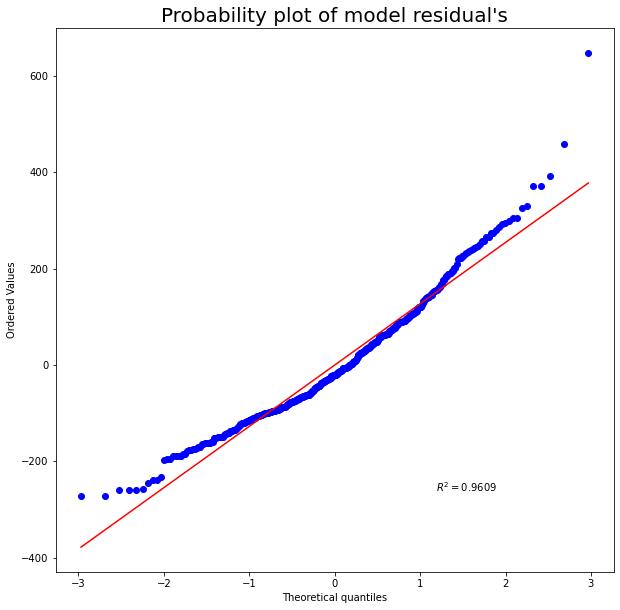

In [9]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

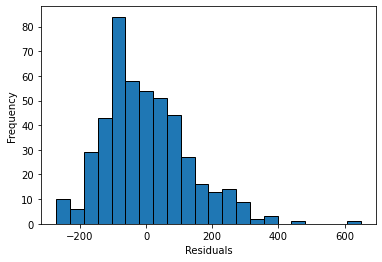

In [10]:
# A histogram plot showing the distribution of the residuals.

plt.hist(model.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

The above plots highlight the value and importance of visualisaing the data. The Probability Plot (QQPlot) created using scipy's stats.probplot method indicates that the extent of deviation form normality might not be as extreme as the result of the Shapiro-Wilk test indicated. Many of the data points sit along the 45 degree diagonal line in the QQPlot indicating the observed and expected values are similar if the data is normal in distribution. The tails of the distribution do seem to deviate somewhat from the expected value. The histogram makes the picture clearer and we can see that although the residuals for the DV are starting to take on a bell-shaped appearance, typical of a normal distribution, the data appears to be slightly positively skewed with one fairly extreme value probably influencing the shape of the distribution away from normality. Given the distribution of the residuals here, an option that we might consider is using a data transformation to reduce the skew in the data to make it closer to a Gaussian (normal) distribution. 

### Homogeneity of Variance

The final assumption for an ANOVA statistical model is that all the groups in the IV that are being compared have equal variances. This means that the amount of variability around each group mean is not significantly different. Variance captures the spread of scores around the mean for each group. If the spread is significantly different between groups then our ANOVA test may not detect differences between the groups as grearer variance for one group may mask possible differences between the group means. To test for homogeneity of variances we can use both statistical methods and visualisations. Here I will use Levene's test and Bartlett's test. Both return a tests statistic and p-value, where a significant p-value (p < 0.05) indicates that the assumption has been violated and there are potential issues with our data. Levene's test is argued to be more robust when the data deviates from normality. As the residuals for the DV on the data we are using here appear to deviate slghtly from normality the Levene test may be the most appropriate. I will also use boxplots to visually inspect the variability around the groups. This in conjunction with the statistical test may help us to make a  more accurate assessment of this assumption. 

In [11]:
# Running Levene's test looking at variances between the IV groups on the DV. 
# Here I have passed the sample data for each newage group on the stress DV. 
# I have used the scipy levene method. 

stats.levene(df['stress'][df['newage'] == '20s'],
             df['stress'][df['newage'] == '30s'],
             df['stress'][df['newage'] == '40s'],
             df['stress'][df['newage'] == '50s'])

LeveneResult(statistic=4.874690934473838, pvalue=0.0023967865704997045)

Above, the scipy.levene method returns a test statistic and p-value. We can see here that the test is statistically significant (p = 0.002). As with the previous statistical tests of asusmptions covered, the null hypothesis for Levene's test is that the variances of the different groups are equal. A significant Levene's test indicates that the null hypothesis is unlikely to be true and that this assumption has been violated in our data and we cannot assume homogeneity of variance. 

In [12]:
# The scipy bartlett test can also be used. 
stats.bartlett(df['stress'][df['newage'] == '20s'],
             df['stress'][df['newage'] == '30s'],
             df['stress'][df['newage'] == '40s'],
             df['stress'][df['newage'] == '50s'])

BartlettResult(statistic=25.775974828179255, pvalue=1.0624984234346044e-05)

The scipy bartlett method is a different test to the Levene's test. It also returns a test statistic and p-value. Similarly to the Levene's test a significant result indicates that the assumption of equal variances between the groups has been violated. Here we can see that Bartlett's test returns a test statistic of W = 25.78 and a p-value of p < 0.001. This is again a significant result suggesting that we cannot assume equal variances for our data. 

Visually inspecting a boxplot can help us to see the differences in variances between out groups. 

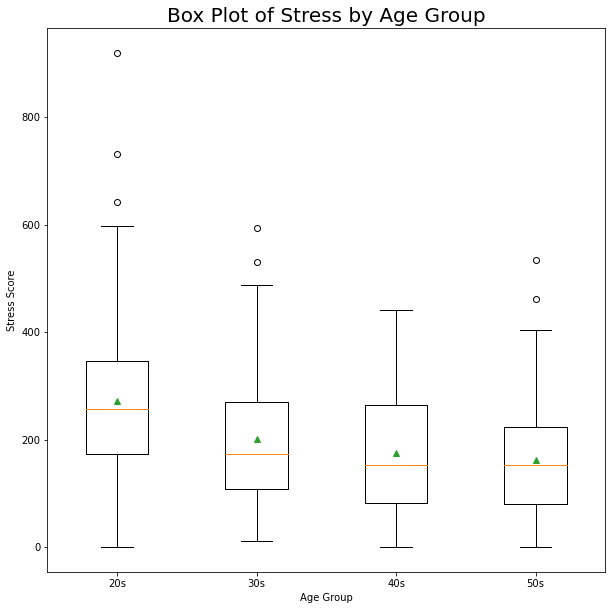

In [13]:
# Using matplotlib to create a boxplot to visualise the variability around the mean of stress for each age group.
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Stress by Age Group", fontsize= 20)
ax.set

data = [df['stress'][df['newage'] == '20s'],
        df['stress'][df['newage'] == '30s'],
        df['stress'][df['newage'] == '40s'],
        df['stress'][df['newage'] == '50s']]

ax.boxplot(data,
           labels= ['20s', '30s', '40s', '50s'],
           showmeans= True)

plt.xlabel("Age Group")
plt.ylabel("Stress Score")

plt.show()

The above boxplot provides useful context to understand the Levene's and Bartlett's statistical tests. We can see that the group means differ (the yellow line) with the 20s age group having the highest mean stress scores. However, the variability about each group mean differs significantly, the 50s age group has the narrowest spread of scores, as shown by the spread of whiskers on the boxplot. In contrast to this the 20s age group has a much wider range of scores that covers almost the whole range of values on the stress scale. This indicates that even if the group means are different the large spread of the whiskers (covering the 95% confidence interval) will overlap significantly and the ANOVA model may produce erroneous results. Working with this dataset we may want to look at any scores that are outliers and remove them to see if this makes the group variances more equal. 

Below, I have used the numpy var method to obtain the variance for the 20s and 50s age groups. We can see that these two values are quite different with the 20s age group having a much higher variance (20s = 26733; 50s = 11252). 

In [14]:
twen_var = np.var(df['stress'][df['newage'] == '20s'])
twen_var

26733.72945521699

In [15]:
fift_var = np.var(df['stress'][df['newage'] == '50s'])
fift_var

11252.57602845059


### Summary:

- Three main assumptions have to be met when conducted an ANOVA test.
- Independence has no direct test and needs to be considered in the design stage of an experiment or study. 
- Normality can be assessed using data visualisation and statistical tests. In ANOVA normality is tested on the residuals of the DV. The Shapiro-Wilk test can be used for this. Useful data visualisations for normality include QQPlots/ Probability Plots and histograms. 
- Homogeneity of Variance is the assumption that variances around the groups means being compared are equal. This can be assessed using data visualisation and statistical tests. The Levene's test and Bartlett's test are both tests of equal variances. Levene's test is argued to be preferrable when the assumption of normality has been violated. Boxplots can be used to visualise the spread of scores for each group/ category in the IV. 
- Data visualisations tend to perform better than statistical tests of assumptions. These tests have several weaknesses in that they may be underpowered when sample sizes are small and may highlight small deviations as signficant in larger sample sizes. 